In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import os
imgpath = '/content/drive/MyDrive/class/DIP1/DIP4E'
#os.listdir(imgpath)


- gamma correction

In [79]:
f = plt.imread(imgpath+'/spine.tif')
print(f.shape,f.dtype)

(488, 373) uint8


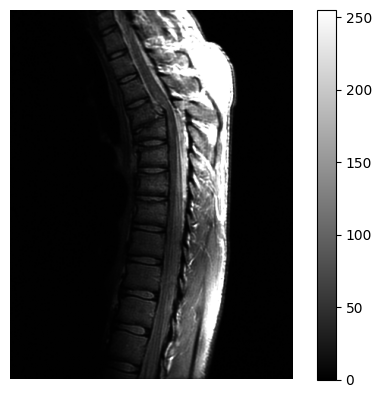

In [80]:
plt.imshow(f, cmap = 'gray')
plt.axis('off')
plt.colorbar()
plt.show()

### Exercise 1
- 아래의 예는 gamma값을 잘못 설정하여 보정을 한 것 같다. 적절한 gamma를 찾아서 영상을 개선시켜보자.

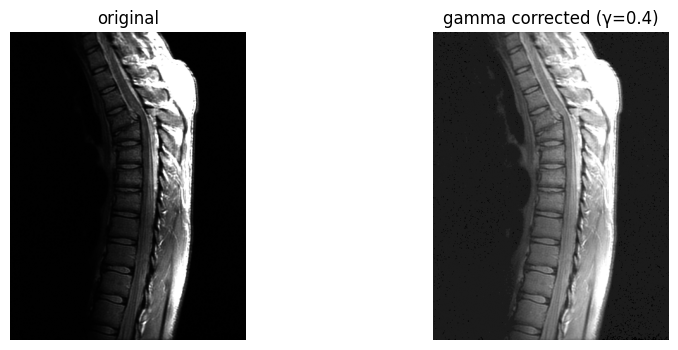

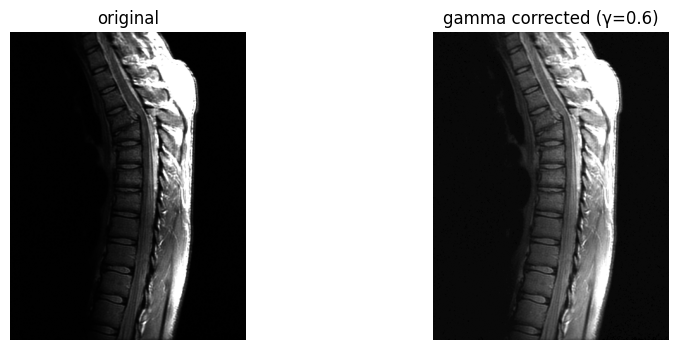

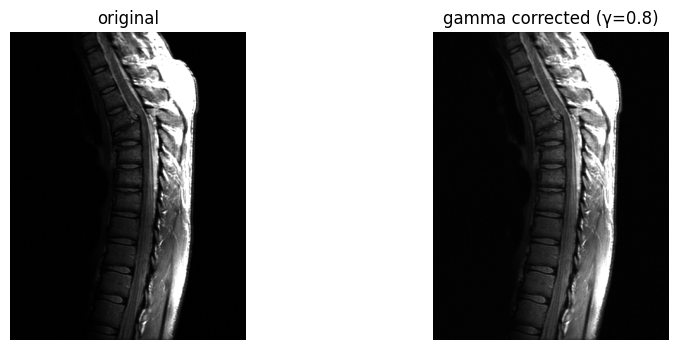

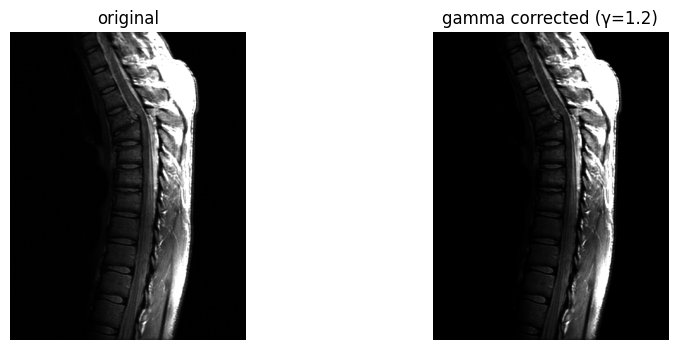

In [82]:
for gamma in [0.4, 0.6, 0.8, 1.2]:
    f_gc = np.power(f, gamma)
    c = np.max(f) / np.max(f_gc)
    f_gc = c * f_gc

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title('original')
    plt.axis('off')
    plt.imshow(f, cmap='gray')

    plt.subplot(1,2,2)
    plt.title(f'gamma corrected (γ={gamma})')
    plt.axis('off')
    plt.imshow(f_gc, cmap='gray')
    plt.show()

- local histogram equalization

In [98]:
f = plt.imread(imgpath+'/hidden-symbols.tif')
print(f.shape,f.dtype)

(256, 256) uint8


In [99]:
def histogram_equalization(image):
    histogram, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    cdf = histogram.cumsum()
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    cdf_normalized = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)
    cdf_normalized = cdf_normalized.astype(np.uint8)
    equalized_image = cdf_normalized[image]
    return equalized_image

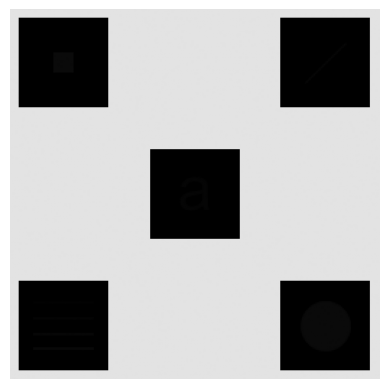

In [100]:
plt.imshow(f,vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.show()

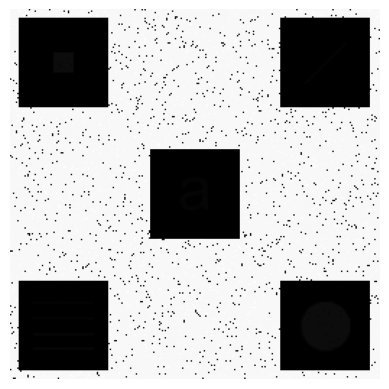

In [101]:
f_eq = histogram_equalization(f)
plt.imshow(f_eq,vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.show()

### Exercise 2.
- 아래의 예는 local histogram equalization을 수행한다.
- 적절한 neighborhood size N을 찾아서 숨겨진 기호들을 모두 확인해보자.
- plt.imshow의 vim, vmax를 수정하여서도 숨겨진 기호들을 확인할 수 있으나, 본 실습에서는 vmax=255로 고정하여 histogram processing을 통해 숨겨진 기호들을 확인하자.

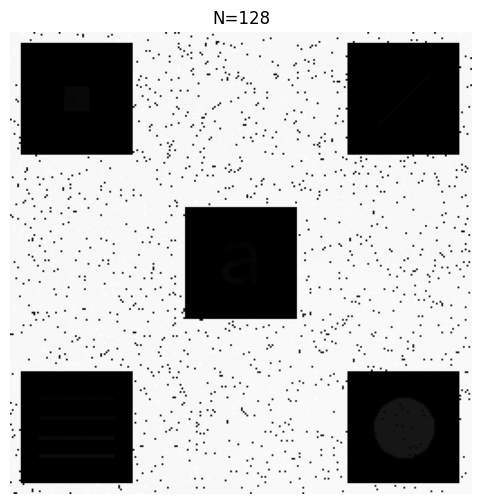

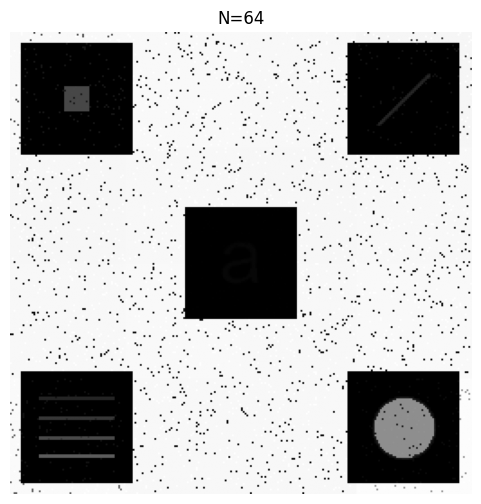

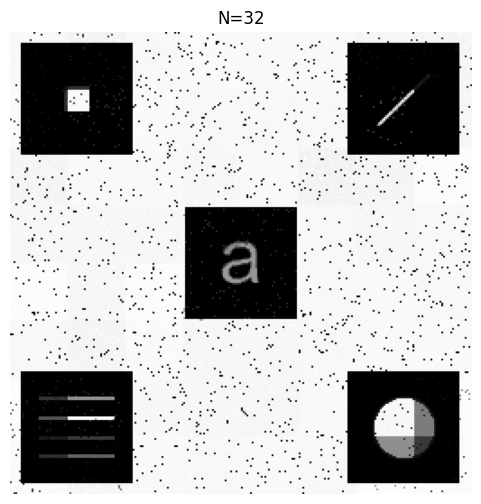

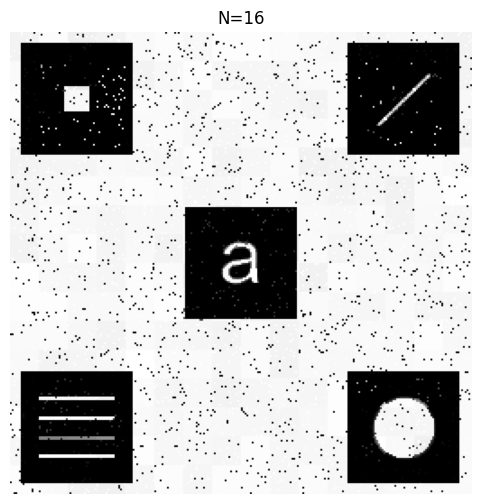

In [102]:
for N in [128, 64, 32, 16]:
  f_eq_local = np.zeros_like(f)
  for x in np.arange(0, 256, N):
    for y in np.arange(0, 256, N):
      f_eq_local[x:x+N, y:y+N] = histogram_equalization(f[x:x+N, y:y+N])

  plt.figure(figsize=(6,6))
  plt.imshow(f_eq_local, vmin=0, vmax=255, cmap='gray')
  plt.title(f'N={N}')
  plt.axis('off')
  plt.show()

In [64]:
import scipy.signal as signal
from skimage import io

### Exercise 3.
- 직접 찍은 사진을 grayscale image로 불러와서, kernel size를 3x3, 7x7, 15x15, 30x30 으로 늘려가며 box kernel을 정의하여 LPF를 진행한 결과를 출력하고 kernel size에 따른 연산시간의 차이를 확인하자.

In [93]:
f = io.imread(' img01.jpeg',as_gray=True)
print(f.shape,f.dtype)

(4512, 8000) float64


In [94]:
import time

computation time =  1.793586254119873  sec


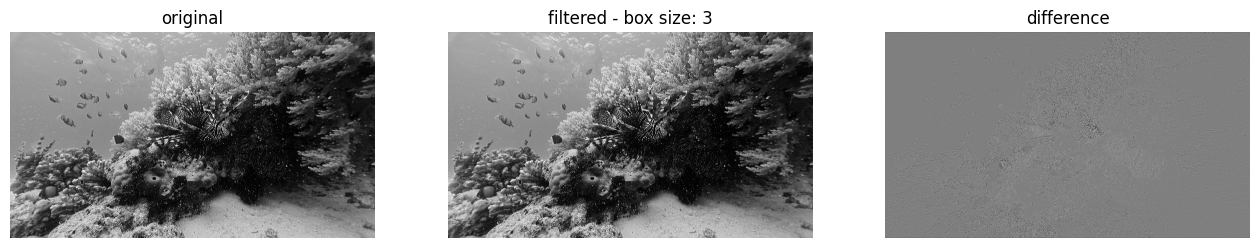

computation time =  5.564021348953247  sec


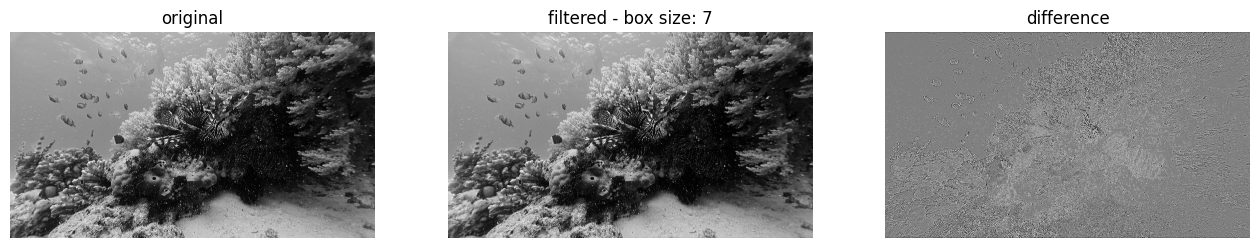

computation time =  21.672051668167114  sec


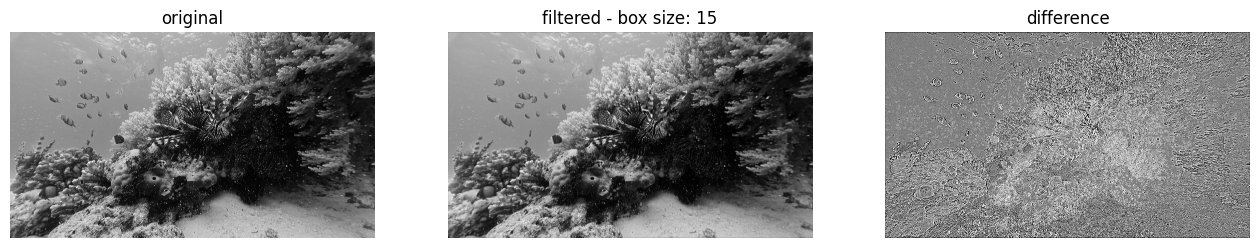

computation time =  77.60171461105347  sec


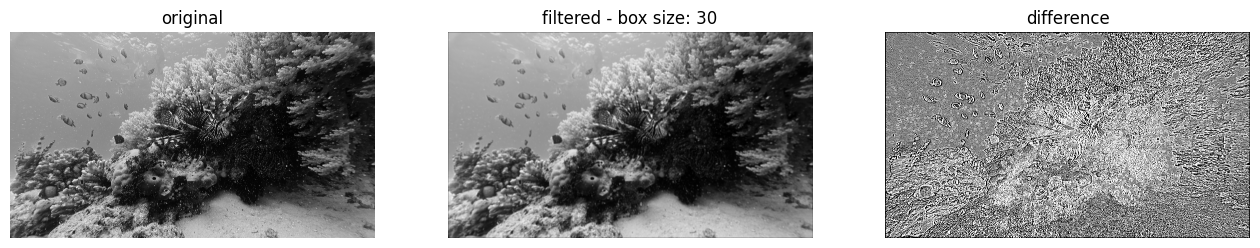

In [96]:
times = []
for N in np.array([3,7,15,30]):
  wb = np.ones((N,N))
  wb = wb/np.sum(wb)
  s0 = time.time()
  y_b = signal.convolve2d(f,wb,mode='same')
  compu_time=time.time() - s0
  times.append((N, compu_time))
  print('computation time = ', compu_time,' sec')
  plt.figure(figsize=(16,9))
  plt.subplot(1,3,1)
  plt.imshow(f,cmap='gray')
  plt.axis('off')
  plt.title('original')
  plt.subplot(1,3,2)
  plt.imshow(y_b,cmap='gray')
  plt.axis('off')
  plt.title(f'filtered - box size: {N}')
  plt.subplot(1,3,3)
  plt.imshow(y_b-f,cmap='gray',vmin=-.01,vmax=.01)
  plt.axis('off')
  plt.title('difference')
  plt.show()

In [97]:
print("\nKernel Size | Computation Time (sec)")
print("-----------------------------------")
for N, t in times:
  print(f"{N:10d} | {t:.6f}")


Kernel Size | Computation Time (sec)
-----------------------------------
         3 | 1.793586
         7 | 5.564021
        15 | 21.672052
        30 | 77.601715
